<a href="https://colab.research.google.com/github/Reshmag026/My-Projects/blob/main/Global_Airline_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/Airline Dataset Updated.csv")


In [4]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [5]:
df.nunique()

Passenger ID            32726
First Name               8215
Last Name               23666
Gender                      2
Age                        90
Nationality               235
Airport Name             8799
Airport Country Code      233
Country Name              233
Airport Continent           6
Continents                  6
Departure Date            364
Arrival Airport          8758
Pilot Name              32725
Flight Status               3
dtype: int64

In [6]:
df.describe()

,Age
count,32726.000000
mean,45.697519
std,25.950313
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


In [7]:
df.dtypes

Passenger ID            object
First Name              object
Last Name               object
Gender                  object
Age                      int64
Nationality             object
Airport Name            object
Airport Country Code    object
Country Name            object
Airport Continent       object
Continents              object
Departure Date          object
Arrival Airport         object
Pilot Name              object
Flight Status           object
dtype: object

In [8]:
df.isna().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              1
Flight Status           1
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

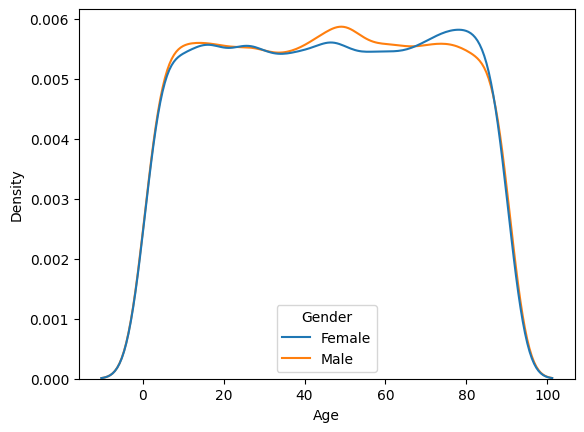

In [9]:
from seaborn import kdeplot
kdeplot(data=df, x='Age', hue='Gender')

The uniform distribution of ages in the dataset suggests that it might be a sample carefully selected from a larger dataset to ensure nearly equal representation across different age groups

In [10]:
low_flight_threshold = 7000

In [11]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

In [12]:
df['Departure Month'] = df['Departure Date'].dt.month

In [13]:
monthly_flight_counts = df['Departure Month'].value_counts().sort_index()

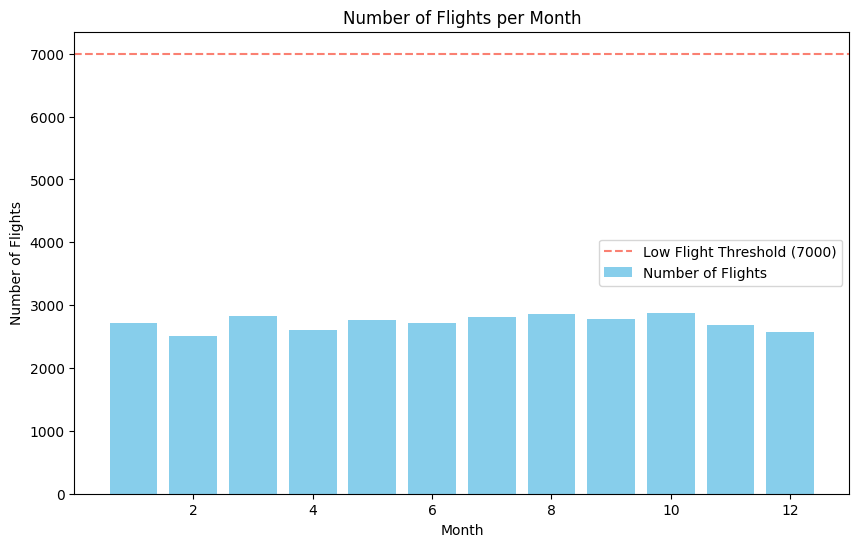

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_flight_counts.index, monthly_flight_counts, color='skyblue', label='Number of Flights')
plt.axhline(y=low_flight_threshold, color='salmon', linestyle='--', label=f'Low Flight Threshold ({low_flight_threshold})')
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.legend()
plt.show()

The analysis reveals that the busiest months for flights are January, October, November, and December.

In [15]:
country_counts = df['Country Name'].value_counts()

In [16]:
top_20_countries = country_counts.head(20)

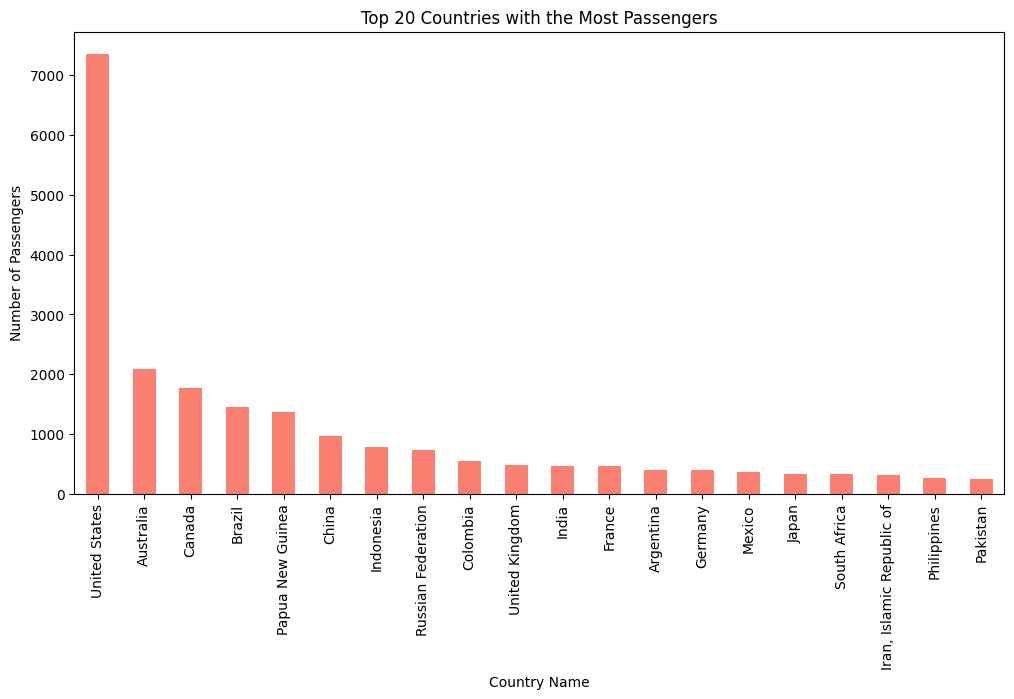

In [17]:
plt.figure(figsize=(12, 6))
top_20_countries.plot(kind='bar', color='salmon')
plt.title('Top 20 Countries with the Most Passengers')
plt.xlabel('Country Name')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=90)
plt.show()

The above graph shows Top 20 countries with most passengers.The Top country with the most passengers are from United States

In [18]:
flight_status_counts = df['Flight Status'].value_counts()

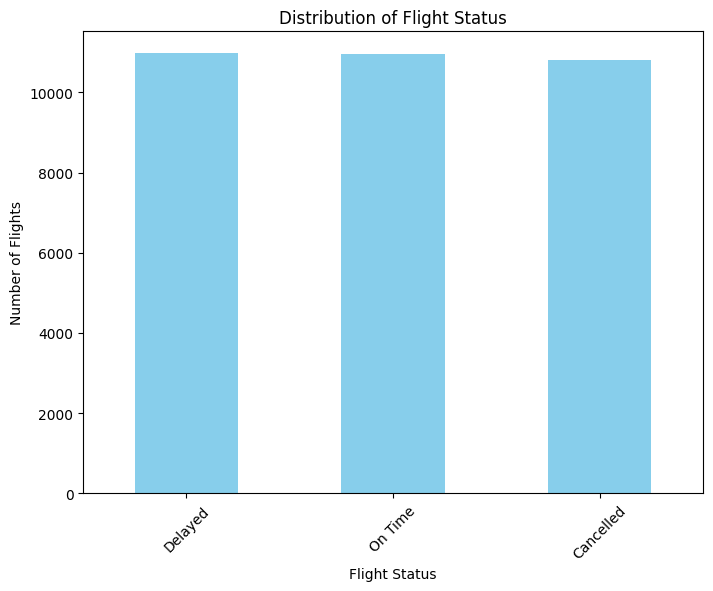

In [19]:
plt.figure(figsize=(8, 6))
flight_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()